In [2]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load the titanic dataset

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv"

df = pd.read_csv(url)

# Inspect the data

print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [5]:
# Handle the missing values. As we can see first that out 891 values "Age" has only 714 values. "Embarked" has 889 non null values
df["Age"] = df["Age"].fillna(df["Age"].median()) #using median value to fill in here as ships during those days had age criteria for people to travel
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0]) # replaces missing values in the Embarked column with the most common embarkation port

# Remove duplicates

df = df.drop_duplicates()

# Filter data: passengers in 1st class

first_class = df[df["Pclass"] == 1]
print(f"First class passengers: \n{first_class.head()}")

First class passengers: 
    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
11           12         1       1   
23           24         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
23                       Sloper, Mr. William Thompson    male  28.0      0   

    Parch    Ticket     Fare Cabin Embarked  
1       0  PC 17599  71.2833   C85        C  
3       0    113803  53.1000  C123        S  
6       0     17463  51.8625   E46        S  
11      0    113783  26.5500  C103        S  
23      0    113788  35.5000    A6        S  


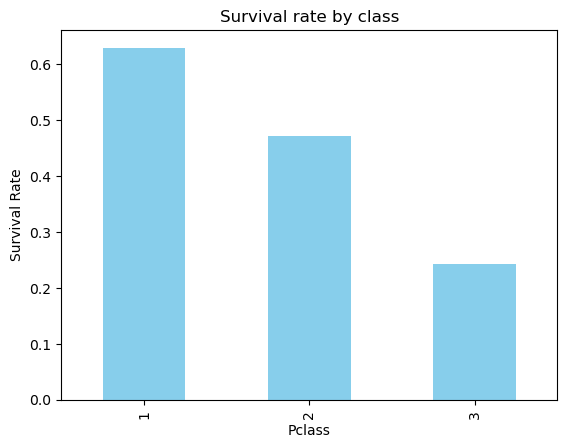

In [7]:
# Generate visualizations to illustrate key insights
# Bar chart: Survival rate by class

survival_by_class = df.groupby("Pclass")["Survived"].mean()
survival_by_class.plot(kind = "bar", color = "skyblue")
plt.title("Survival rate by class")
plt.ylabel("Survival Rate")
plt.show()


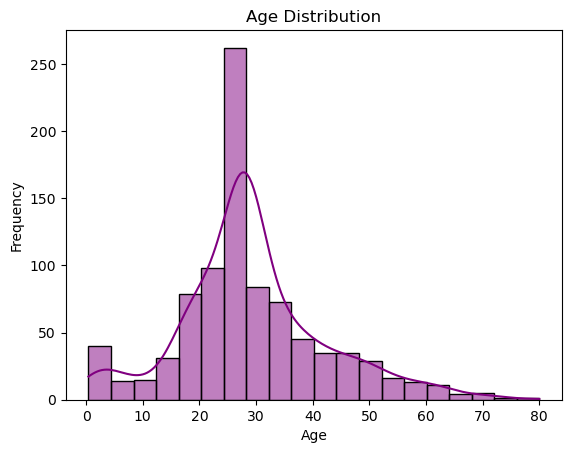

In [11]:
# histogram age distribution
sns.histplot(df["Age"], kde=True, bins=20, color="purple")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

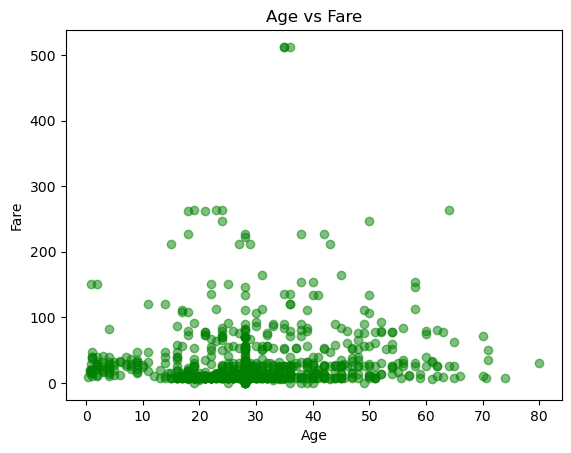

In [12]:
# scatter plot of age vs fare

plt.scatter(df["Age"], df["Fare"], alpha = 0.5, color="green")
plt.title("Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()
